Para o entendimento do assunto, descosidere os códigos da célula a seguir. Eles são utilizados para plotagem de tabelas e gráficos do conteúdo. 

In [274]:
# Import and Support Functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline


def or_data():
    
    data = pd.DataFrame([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]], columns=['x1', 'x2', 'classe'])
    
    return data

def and_data():
    
    data = pd.DataFrame([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]], columns=['x1', 'x2', 'classe'])
    
    return data

def xor_data():
    
    data = pd.DataFrame([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]], columns=['x1', 'x2', 'classe'])
    
    return data


def man_woman_data(normalize=False):
    
    data = pd.read_csv("http://www.data2learning.com/datasets/basehomemulher2.csv", index_col=0, sep=";")
    
    if normalize:
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(data[['peso','altura']])
        data[['peso','altura']] = x_scaled
    
    return data
    

def custom_style(row):
    color = '#b5e7a0'
    if row.values[2] != row.values[4]:
        color = '#eca1a6'
    
    style_return = ['background-color: %s' % color]*len(row.values)
    
    return style_return

# Função para plotar o modelo
def plot_function(w1, w2, b): 
    
    print("Coeficiente angular: %.4f" % (w1/w2))
    print("W1: %.4f" % w1)
    print("W2: %.4f" % w2)
    print("b: %.4f" % b)
    
    # Calc the hyperplane (decision boundary)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    xx = np.linspace(xmin, xmax)
    yy = (-w1 * xx - b) / w2
    
    
    # Plot the hyperplane
    plt.plot(xx,yy, 'k-')
    plt.ylim([ymin,ymax])
    plt.show()

# Redes Neurais
com Scikit-Learn

**`Referências:`**

    [1] Inteligência Artificial - Uma Abordagem de Aprendizado de Máquina (CARVALHO, André Carlos Ponce de Leon Ferreira de; FACELI, Katti; LORENA, Ana Carolina; GAMA, João). 
    
    [2] Redes Neurais Artificiais para Engenharia e Ciências Aplicadas - fundamentos teóricos e aspectos práticos (SILVA, Ivan Nunes da; SPATTI, Danilo Hernane; FLAUZINO, Rogério Andrade).


Nesse tutorial vamos trabalhar alguns conceitos básicos sobre Redes Neurais. Por ser um tutorial mais básico vou utilizar o próprio scikit-learn. Um estudo mais aprofundado das redes neurais será colocado juntamente com o material do Tensorflow. 

As redes neurais vem de um desejo de criar máquinas que de alguma forma "imitem" o comportamento humano. Melhor ainda, "imitar" um comportamento que ocorre de forma natural no cérebro humano. Nós humanos conseguimos realizar tarefas que para nós são simples e imediatas, mas que ao passa-las para uma máquina não se tornam tão simples. O desenvolvimento das redes neurais parte  do princípio de construir um mecanismo que possa de alguma forma executar as tarefas realizadas pelo cérebro humano. Para entender como as redes neurais funcionam, é preciso entender como funciona o sistema nervoso humano. 

Quem quiser conhecer um pouco o histórico das redes neurais, visite [este link](http://www.andreykurenkov.com/writing/ai/a-brief-history-of-neural-nets-and-deep-learning/).

## O sistema nervoso humano

A imagem a seguir mostra o principal componente do sistema nervoso humano: os neurônios. É através deles que o cérebro transmite e processa a gama de informações que capturamos. A estrutura complexa do cérebro faz tarefas complexas parecerem triviais. 

<img src="http://www.data2learning.com/machinelearning/images_notebook/redesneurais_neuronio.png">
<div style="text-align: center">Imagem retirada de [1]</div>

Para entender um pouco de como o neorônio, veja o vídeo a seguir:

Vídeo por: Khan Academy


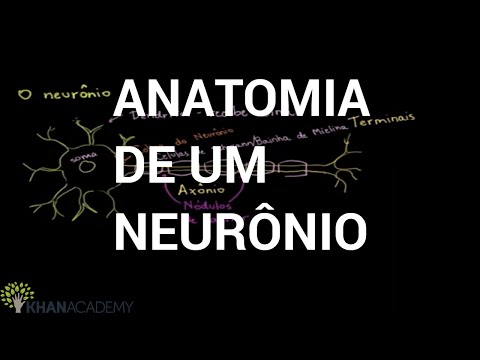

In [236]:
from IPython.display import YouTubeVideo, Image

print("Vídeo por: Khan Academy")
YouTubeVideo('r8D16C6-D5M')

## Redes Neurais Artificiais (RNA)

Segundo [1]. 

> "As RNAs são sistemas computacionais distribuídos compostos de unidades de processamento simples, densamente interconectadas. Essas unidades, conhecidas como neurônios artificiais, computam funções matemáticas. As unidades são dispostas em uma ou mais camadas e interligadas por um grade número de conexões, geralmente unidirecionais. Na maioria das arquiteturas, essas conexões, que simulam as sinapses biológicas, possuem pesos associados, que ponderam a entrada recebida por cada neurônio da rede. Os pesos podem assumir valores positivos ou negativos, dependendo de o comportamento da conexão ser excitatório ou inibitório, respectivamente. Os pesos têm seus valores ajustados em um processo de aprendizado e codificam o conhecimento adquirido pela rede".

A imagem a seguir mostra a arquitetura de um neurônio artificial:

<img src="https://www.data2learning.com/machinelearning/images_notebook/redesneurais_rna.png">

Formalmente, podemos descrever esse processo da seguinte forma: 

O neurônio com $d$ terminais (que simula os dendritos) recebe como entrada um objeto $x$ com $d$ atributos. Esse objeto é representado pelo vetor $x = [x_1, x_2, ..., x_d]^t$. Cada terminal do neurônio tem um peso $w$ associado. Estes pesos podem ser representados também por um vetor $w = [w_1, w_2, ..., w_d]$. A entrada total do neurônio é representada pela equação:

$u = \sum_{j=1}^{d}{x_j w_j}$

A saída do neurônio é determinada pela aplicação de um função de ativação ($f_a$) à entrada total $u$:

<img src="https://www.data2learning.com/machinelearning/images_notebook/redesneurais_fa.png">

Várias funções de ativações aparecem na literatura. A imagem a seguir mostra três dessas funções: (a) linear, (b) limiar e (c) sigmoidal:

<img src="https://www.data2learning.com/machinelearning/images_notebook/redesneurais_funcoes.png">

A função linear identidade implica retornar como saída o valor de $u$. Na função limiar, o valor do limiar define quando o resultado da função será igual a 1 ou 0. Quando a soma das entradas recebidas ultrapassa o limiar estabelecido, o neurônio torna-se ativo. Quanto maior o valor do limiar, maior tem que ser o valor da entrada total para que o valor de saída do neurônio seja igual a 1. Na função sigmoidal, diferentes inclinações podem ser utilizadas.

Em uma rede neural, os neurônios podem está dispostos em mais de uma camada. Em uma arquitetura de várias camadas a saída de um neurônio é entrada para outro neurônio. A imagem a seguir mostra esse tipo de arquitetura: 

<img src="https://www.data2learning.com/machinelearning/images_notebook/redesneurais_multicamadas.png">

Alguns modelos de redes neurais permite a retroalimentação (ou *feedback*). Nesse tipo de redes é permitido que um neurônio receba como entrada as saídas geradas por camadas posteriores ou pela própria camada. Desta forma, podemos classificar as redes neurais em **RNA *feedfoward*** (sem retroalimentação) ou redes recorrentes (com retroalimentação).




# Rede Perceptron

A rede perceptron é a forma mais simples de configuração de uma rede neural artificial. A arquitetura da rede se aproxima daquela que foi apresentada no problema de regressão linear. Antes de detalharmos a arquitetura desse tipo de rede, vamos trabalhar com o seguinte exemplo. 

In [237]:
data_ = man_woman_data()
data_

,peso,altura,classe
1,50,1.60,0
2,53,1.65,0
3,60,1.58,0
4,62,1.62,0
5,70,1.50,0
6,68,1.70,0
7,75,1.60,0
8,75,1.73,0
9,65,1.64,0
10,72,1.62,0


Como a escala de cada uma das features são bem distintos, vamos deixar as duas features na escala de 0 a 1. 

In [238]:
data_ = man_woman_data(normalize=True)
data_

,peso,altura,classe
1,0.000000,0.285714,0
2,0.054545,0.428571,0
3,0.181818,0.228571,0
4,0.218182,0.342857,0
5,0.363636,0.000000,0
6,0.327273,0.571429,0
7,0.454545,0.285714,0
8,0.454545,0.657143,0
9,0.272727,0.400000,0
10,0.400000,0.342857,0


Plotando os dados, temos:

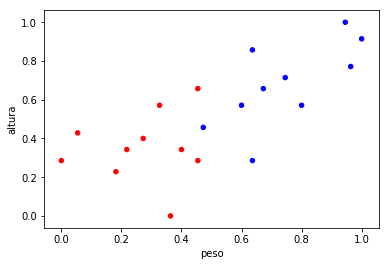

In [239]:
colors = {0:'red', 1:'blue'}

# Plotagem dos valores da base de treinamento
data_.plot(kind='scatter', x='peso', y='altura',c=data_['classe'].apply(lambda x: colors[x])) 

Vamos construir um modelo arbitrário que consiste em uma função capaz de separar o conjunto de dados. Vamos utilizar neste caso, uma função linear. Esse modelo é construído a partir da seguinte equação: 

$\hat{y} = w_1*x_1 + w_2*x_2 + b$. 

No exemplo, temos:

$w_1 = -0.3$

$w_2 = -0.4$

$b = 0.28$

Coeficiente angular: 0.7500
W1: -0.3000
W2: -0.4000
b: 0.2800


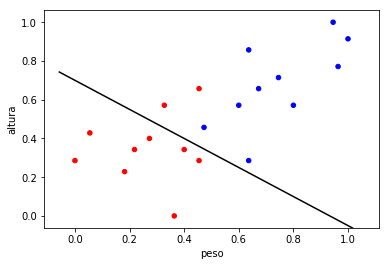

In [240]:
w1 = -0.3
w2 = -0.4
b = 0.28

data_ = man_woman_data(normalize=True)
data_.plot(kind='scatter', x='peso', y='altura',c=data_['classe'].apply(lambda x: colors[x])) 
plot_function(w1, w2, b)

Perceba que mudar os valores destas três variáveis ($w_1$, $w_2$ e $b$) vai mudar a reta que separa o conjunto de dados. Mude os valores anteriores e perceba o comportamento da função. É fácil perceber que essas alterações implicam em mais ou menos dados classificados corretamente. Por exemplo, no exemplo anterior, o modelo classifica corretamente todos os dados azuis, no entanto, erra em dois casos dos pontos vermelhos. 

Se mudarmos, os valores:

Coeficiente angular: 0.5714
W1: -0.2000
W2: -0.3500
b: 0.2800


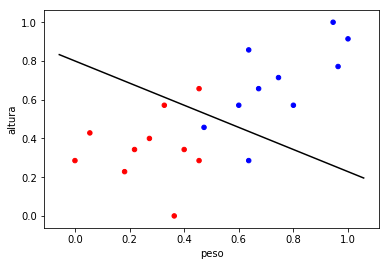

In [241]:
w1 = -0.2
w2 = -0.35
b = 0.28

data_ = man_woman_data(normalize=True)
data_.plot(kind='scatter', x='peso', y='altura',c=data_['classe'].apply(lambda x: colors[x])) 
plot_function(w1, w2, b)

Esse novo modelo classifica de forma errada dois pontos azuis e um ponto vermelho. Se calcularmos a acurácia dos dois modelos temos:

In [242]:
print("Modelo 1")
print("Acurácia %.2f %%: " % ((18/20) * 100))
print("")
print("Modelo 2")
print("Acurácia %.2f %%: " % ((17/20) * 100))

Modelo 1
Acurácia 90.00 %: 

Modelo 2
Acurácia 85.00 %: 


Os pontos classificados como azuis são aqueles nos quais $\hat{y} > 0$, os pontos classificados como vermelhos são aqueles que $\hat{y} < 0$. Vamos ver isso na prática usando o último modelo construído.

In [244]:
def classification_function(value):
    
    if value > 0:
        return 0
    else:
        return 1

def my_model(x1, x2):
    
    w1 = -0.2
    w2 = -0.35
    b = 0.28
    
    return w1 * x1 + w2 * x2 + b
    
data_ = man_woman_data(normalize=True)
data_['function_model'] = np.vectorize(my_model)(data_['peso'], data_['altura'])
data_['classification'] = np.vectorize(classification_function)(data_['function_model'])
data_style = data_.style.apply(custom_style, axis=1)
#data_ = data_.style.format({'peso': "{:0<4.0f}", 'altura': '{:+.2f}'})

data_style

,peso,altura,classe,function_model,classification
1,0,0.285714,0,0.18,0
2,0.0545455,0.428571,0,0.119091,0
3,0.181818,0.228571,0,0.163636,0
4,0.218182,0.342857,0,0.116364,0
5,0.363636,0,0,0.207273,0
6,0.327273,0.571429,0,0.0145455,0
7,0.454545,0.285714,0,0.0890909,0
8,0.454545,0.657143,0,-0.0409091,1
9,0.272727,0.4,0,0.0854545,0
10,0.4,0.342857,0,0.08,0


O que acabamos de construir é o que chamamos de rede perceptron. A função apresentada consiste de pesos que são multiplicados a cada uma das entradas e o resultado somado com um valor $b$. A esse resultado aplicamos uma função que retorna 0 ou 1 (neste caso) a depender do valor retornado pela função inicial. 

Formalmente, temos exatamente o que a imagem a seguir descreve: 

<img src="https://www.embarcados.com.br/wp-content/uploads/2016/09/Perceptron-01.png" width="50%" />
<div style="text-align: center">Arquitetura da rede perceptron</div>

Observe que a rede é composta por um conjunto de sinais de entrada ($x_{train} = [x_1, x_2, ..., x_n]$). Cada sinal é poderado por um peso w, dado por $weights = [w_1, w_2, ..., w_3]$ e somado por um limiar de ativação ($\theta$). Sendo assim, o neurônio é representado pela seguinte operação: 

$u = \sum_{i=1}^{n}{w_i*x_i} + bias$

O valor inicial do $bias$ é dado por $-\theta$. Neste exemplo, $\theta = 1$.

O valor de $u$ é entrada para uma função de ativação ($g$) gerando o sinal de saída $y=g(u)$.

Nesse exemplo, a função de ativação é dada por: 

$g(u) = 1$, se $u >= 0$

$g(u) = 0$, se $u < 0$

Ou seja, estamos utilizando uma função limiar.

Observe que essa rede faz exatamente o que fizemos com o exemplo da base de homens e mulheres. No entanto, no nosso exemplo, os pesos e os valores do bias foram determinados de forma aleatória. Como isso é feito dado o processo de aprendizagem de uma rede percpetron? Vejamos a seguir:

### O processo de aprendizagem de uma rede neural

Modelo criado. A próxima etapa é definir como nosso modelo será treinado. Ou seja, como um modelo deste tipo aprende. 

Este problema é uma tarefa de classificação. Cada instância vai ser classificada como 0 ou 1 de acordo com a classe que pertence. Sendo assim, o primeiro passo é comparar a saída com a classificação da base de treinamento. Para isso foi calculado o erro da seguinte forma:

$mse = \sum_{i = 1}^{N}{(y_i - output_i)^2}$

onde $y_i$ é o valor real e $output_i$ o valor encontrado pelo modelo. 

O objetivo do treinamento é reduzir esse erro. Em outras palavras, estamos interessados em encontrar valores para os pesos e bias que minimizem este erro.

Um outro passo do treinamento é a atualização dos valores dos pesos e do limiar. Esses parâmetros são atualizados segundo fórmula descrita no livro do Ivan Nunes. 

$w_{i}^{atual} = w_{i}^{anterior} + \eta (d^{(k)} - y).x_{i}^{(k)}$

$\theta_{i}^{atual} = \theta_{i}^{anterior} + \eta (d^{(k)} - y).(-1)$

onde:

$d^{(k)}$ é o valor desejado e $y$, o valor de saída produzido pela perceptron. Essa diferença é representada pelo que chamamos do erro que é minimizado. $\eta$ é uma constante que define a taxa de aprendizagem da rede. O valor da taxa de apendizada define a magnitude dos ajustes dos pesos. Valores altos fazem com que as variações sejam grandes, enquanto taxas pequenas implicam em poucas variações nos pesos. Essa magnitude influencia a velocidade de convergência. 

O algoritmo a seguir mostra o processo de treinamento da rede perceptron.

<img src="https://www.data2learning.com/machinelearning/images_notebook/redesneurais_algperceptron.png">

Uma introdução mais detalhada de como funciona a rede perceptron pode ser encontrada no link a seguir:

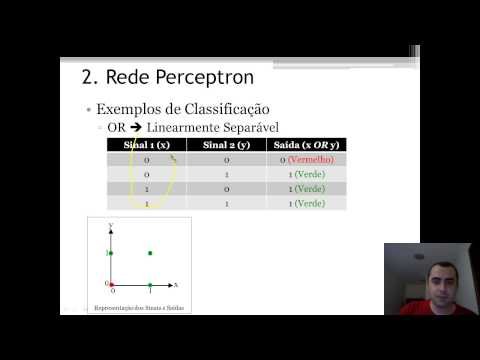

In [5]:
YouTubeVideo('pkAKtL9FvFI')

Antes de mostrarmos como podemos implementar uma rede perceptron no scikit-learn, vamos trabalhar com o seguinte exemplo: 

## Exemplo 1

Construa uma rede perceptron que consiga representar a função **OR**. 

Para construir esse exemplo vamos pensar a função **OR** como um problmea de classificação. As entradas seriam 0 ou 1 e a saída seria também 0 ou 1 a depender da aplicação da função sobre os elementos de entrada. Sendo assim, nossa classe seria a saída da aplicação da função. Resumindo, temos: 


| Entrada x1 | Entrada x2 | Saída x1 OR x2 |
|--|--|--|
| 0 | 0 | 0 |
| 0 | 1 | 1 | 
| 1 | 0 | 1 | 
| 1 | 1 | 1 | 


O gráfico desse problema, seria: 

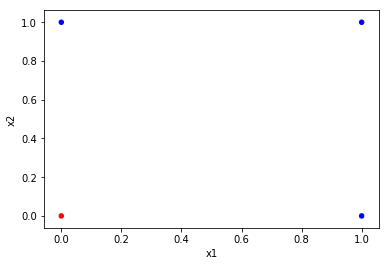

In [253]:
data_or = or_data()
data_or.plot(kind='scatter', x='x1', y='x2',c=data_or['classe'].apply(lambda x: colors[x])) 

Enxergando esse problema como um problema de classificação, queremos definir uma rede perceptron capaz de separar esses pontos. Para isso, precisamos definir 3 coisas: 

1. Os pesos para as entradas; 
2. O valor do bias;
3. A função de ativação

Vamos fazer esse trabalho na mão. 

**Atenção**: No treinamento de uma rede desse tipo não fazemos isso na mão. No entanto, isso é importante para entender cada um dos aspectos da rede. 

### Atividade: 

Defina os valores de w1, w2, b e a função de ativação para a rede perceptron do OR:

Coeficiente angular: 1.0000
W1: 1.0000
W2: 1.0000
b: -0.8000


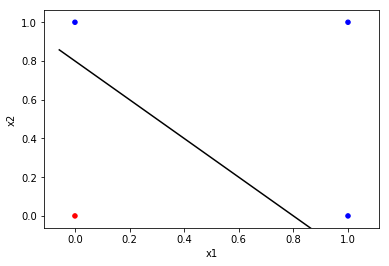

In [268]:
w1 = 1
w2 = 1
b = -0.8

data_or = or_data()
data_or.plot(kind='scatter', x='x1', y='x2',c=data_or['classe'].apply(lambda x: colors[x])) 
plot_function(w1, w2, b)

A função de ativação é a limiar que, nesse caso, retorna 1 se o valor for positivo e 0 se o valor for negativo. Vamos aplicá-la ao nosso exemplo. 

| x1 | x2 | Classe Real | w1\*x1 + w2\*x2 + b | Função de Ativação |
|--|--|--|--|--|
| 0 | 0 | 0 | -0.8 | 0 |
| 0 | 1 | 1 | 0.2 | 1 |
| 1 | 0 | 1 | 0.2 | 1 |
| 1 | 1 | 1 | 1.2 | 1 | 

Perceba que, de fato, nosso modelo separa os dados corretamente. 

Vamos fazer a mesma análise para função **AND**:

## Exemplo 2

Para a função **AND** temos as seguintes entradas e saídas:

| Entrada x1 | Entrada x2 | Saída x1 AND x2 |
|--|--|--|
| 0 | 0 | 0 |
| 0 | 1 | 0 | 
| 1 | 0 | 0 | 
| 1 | 1 | 1 | 

Que no gráfico fica:

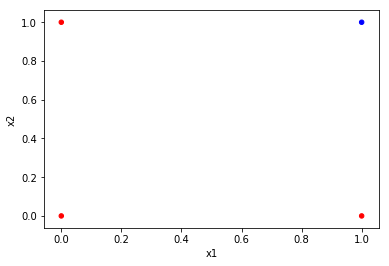

In [270]:
data_and = and_data()
data_and.plot(kind='scatter', x='x1', y='x2',c=data_and['classe'].apply(lambda x: colors[x])) 

### Atividade 

Defina os pesos, bias e função de ativação para a construção do modelo que separe os dados:

Coeficiente angular: 1.0000
W1: 1.0000
W2: 1.0000
b: -1.4000


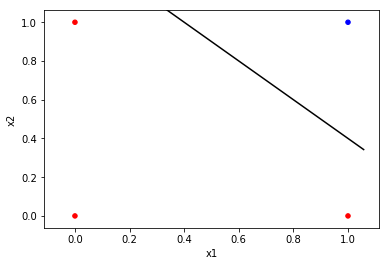

In [273]:
w1 = 1
w2 = 1
b = -1.4

data_and = and_data()
data_and.plot(kind='scatter', x='x1', y='x2',c=data_and['classe'].apply(lambda x: colors[x])) 
plot_function(w1, w2, b)

A função de ativação também é a função limiar que retorna 1 se o valor for positivo e 0 se o valor for negativo. Vamos aplicá-la ao nosso exemplo. 

| x1 | x2 | Classe Real | w1\*x1 + w2\*x2 + b | Função de Ativação |
|--|--|--|--|--|
| 0 | 0 | 0 | -1.4 | 0 |
| 0 | 1 | 1 | -0.6 | 0 |
| 1 | 0 | 1 | -0.6 | 0 |
| 1 | 1 | 1 | 0.6 | 1 | 


Para fechar esse estudo, vamos fazer a mesma atividade, mas agora para a funçõa **XOR**.

## Exemplo 3

A função **XOR** (OU exclusivo) tem as seguintes entradas e saídas:


| Entrada x1 | Entrada x2 | Saída x1 AND x2 |
|--|--|--|
| 0 | 0 | 0 |
| 0 | 1 | 1 | 
| 1 | 0 | 1 | 
| 1 | 1 | 0 | 

No gráfico, temos:

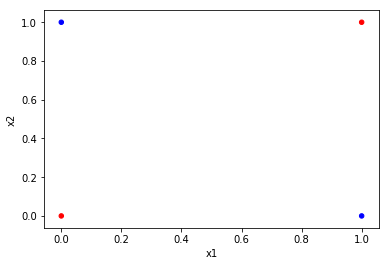

In [275]:
data_xor = xor_data()
data_xor.plot(kind='scatter', x='x1', y='x2',c=data_xor['classe'].apply(lambda x: colors[x])) 

Coeficiente angular: 1.0000
W1: 1.0000
W2: 1.0000
b: -1.4000


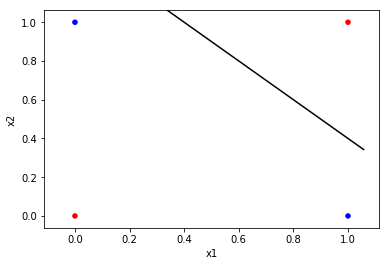

In [277]:
w1 = 1
w2 = 1
b = -1.4

data_xor = xor_data()
data_xor.plot(kind='scatter', x='x1', y='x2',c=data_xor['classe'].apply(lambda x: colors[x])) 
plot_function(w1, w2, b)

Por que independente dos valores que atribuímos a w1, w2 e ao bias não conseguimos encontrar um modelo capaz de separar corretamente os dados? 

## O problema de redes com uma camada

"Uma limitação das redes neurais de uma comada, como as redes perceptron e adaline, é que elas conseguem classificar apenas objetos que são linearmente separáveis".

Supondo que tenhamos uma base de dados com dois atributos. Se plotarmos estes dados em um plano cartesiano, eles vão ser linearmente separáveis se existe uma reta que separa os objetos de uma classe dos objetos de outra classe. 

<img src="http://2.bp.blogspot.com/_NpEM479W8bw/SMAykBAnOUI/AAAAAAAAADE/qmpAY4AoyDo/s320/Linear.PNG">

<img src="http://4.bp.blogspot.com/_NpEM479W8bw/SMAykRqIgYI/AAAAAAAAADM/35mfeqXHi4k/s320/Non+Linear.PNG">

Se em vez de dois atributos a base possui $d$ atributos, o espaço de soluções será $d$-dimensional. Neste caso, os objetos são linearmente separáveis se houver um hiperplano que separe os dados das duas classes.

Para separar os dados da função **XOR** precisamos de uma rede que tenha mais de uma camada. Como assim? 

Vejamos uma rede que separaria corretamente os dados da função **XOR**. 

<img src="http://www.data2learning.com/machinelearning/images_notebook/xor_mlp.png">

Cada "círculo" dessa rede é o que chamamos de neurônio. Cada neurônio é uma única estrutura da que construímos com a perceptron. A diferença é que as saídas de um neurônio alimentam a entrada de um outro neurônio. Essa estrutura é o que chamamos de *Multilayer Perceptron* ou uma rede neural multicamadas. Cada conjunto de neurônios é o que chamamos de camadas de nossa rede. 

Esse modelo consegue separar os dados que não são separados linearmente. Iremos trabalhar esse tipo de modelo mais a frente. Antes vamos implementar uma rede perceptron no scikit-learn. 

### Implementação no Scikit-Learn

A rede perceptron é utilizada em problemas que são ditos linearmente separáveis. Entende-se por esse tipo de problema aqueles que são compostos por dados que podem ser separados por uma função linear. Para isso, vamos criar um conjunto de dados que possuem tal característica. Como o propósito é só mostrar o funcionamento da rede, vamos criar um conjunto de dados sem nenhum próposito específico.

Os dados de entrada são constituídos de várias instâncias contendo duas variáveis cada ($x_1$ e $x_2$) e cada instância é classificada em 0 ou 1. Sendo assim, a tarefa da rede é aprender um modelo que seja capaz de separar estas duas classes. O código a seguir cria os dados e os exibem em um gráfico. 

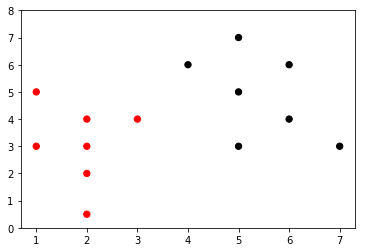

In [278]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Criando os dados de entrada (x = features e y = classes)
x_train = np.array([[2., 2.],[1., 3.],[2., 3.],[5., 3.],[7., 3.],[2., 4.],[3., 4.],[6., 4.],
                    [1., 5.],[2., .5],[5., 5.],[4., 6.],[6., 6.],[5., 7.]],dtype="float32")
y_train = np.array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.], dtype="float32")

#Mostrando o Gráfico
A = x_train[:, 0]
B = x_train[:, 1]

colormap = np.array(['r', 'k'])

# Plot the original data
plt.scatter(A, B, c=colormap[[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]], s=40)

plt.ylim([0,8]) # Limit the y axis size
plt.show()

No scikit-learn a perceptron é implementada pelo módulo **Perceptron**. 

In [280]:
from sklearn.linear_model import perceptron

net = perceptron.Perceptron(max_iter=100, eta0=0.1, random_state=0, verbose=True)


X = x_train
y = y_train.T

net.fit(X,y)

-- Epoch 1
Norm: 1.04, NNZs: 2, Bias: 0.000000, T: 14, Avg. loss: 0.542857
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.90, NNZs: 2, Bias: -0.400000, T: 28, Avg. loss: 0.878571
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 2, Bias: -0.700000, T: 42, Avg. loss: 0.491071
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 2, Bias: -0.900000, T: 56, Avg. loss: 0.592857
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.14, NNZs: 2, Bias: -1.000000, T: 70, Avg. loss: 0.162500
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.23, NNZs: 2, Bias: -1.300000, T: 84, Avg. loss: 0.375000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.02, NNZs: 2, Bias: -1.500000, T: 98, Avg. loss: 0.394643
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 1.13, NNZs: 2, Bias: -1.600000, T: 112, Avg. loss: 0.110714
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 1.02, NNZs: 2, Bias: -1.800000, T: 126, Avg. loss: 0.116071
Total training time: 0.01 seconds.


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=100, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=True, warm_start=False)

Esse modelo treinado possui os seguintes valores para pesos e bias:

In [281]:
# Output the coefficints
print("Coefficient 0 " + str(net.coef_[0,0]))
print("Coefficient 1 " + str(net.coef_[0,1]))
print("Bias " + str(net.intercept_))

Coefficient 0 1.0000000000000007
Coefficient 1 -0.2999999999999995
Bias [-2.1]


(0, 8)

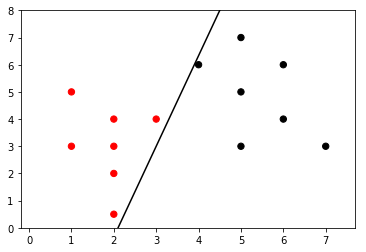

In [282]:
# Plot the original data
plt.scatter(A, B, c=colormap[[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]], s=40)
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = net.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (net.intercept_[0]) / w[1]
 
# Plot the hyperplane
plt.plot(xx,yy, 'k-')
plt.ylim([0,8]) # Limit the y axis size

# Multilayer Perceptron

Uma rede perceptron multicamadas (*Multilayer Perceptron - MLP*) é caracterizada pela presença de pelo menos uma camada intermediária (escondida ou *hidden layer*) de neurônios, situada entre a camada de entrada e a respectiva camada neural de saída. Sendo assim, as MLP possuem pelo menos duas camadas de nurônios, o quais estarão distribuídos entre as camadas intermediárias e a camada de saída. 

A figura a seguir ilustra este modelo.

<img src="https://elogeel.files.wordpress.com/2010/05/050510_1627_multilayerp1.png" />

## Mais um exemplo

Para mostrar este modelo vamos utilizar o exemplo disponível em [neste link](http://www.jessicayung.com/explaining-tensorflow-code-for-a-multilayer-perceptron/) com a base do MNIST para treinar o modelo criado.

Antes de começar a entrar em detalhes da rede, vamos baixar a base do MNIST que será utilizada. O MNIST é um dataset de dígitos escritos a mão. A tarefa consiste em dada uma imagem que representa um dígito escrito à mão classifica-la de acordo com o dígito que foi escrito. Detalhes da base podem ser encontrados [neste link](http://yann.lecun.com/exdb/mnist/). Por ser uma base bastante utilizada, a API do tensorflow já possui a base em um pacote do framework.

Cada imagem do dataset possui o tamanho de 28x28 e representa um dígito escrito à mão. A imagem a seguir ilustra uma instância da base:

<img src="https://www.tensorflow.org/images/MNIST-Matrix.png" width="70%" />

As imagens vão ser transformadas em um vetor de 784 posições ($28*28$). A entrada da rede são vários vetores deste tipo. Cada vetor vai representar uma imagem. A saída da rede é definida por um vetor de 10 posições, onde cada posição representa uma possível classe do dígito (a base do MNIST trabalha com dígitos de 0 a 9).

Se considerarmos que a base de treinamento possui 55000 imagens, as imagens a seguir representam a entrada e saída da rede, respectivamente:

<img src="https://www.tensorflow.org/images/mnist-train-xs.png" width="50%" />
<img src="https://www.tensorflow.org/images/mnist-train-ys.png" width="50%"/>

A diferença desta representação para o modelo que será implementado aqui é que o nosso modelo será alimentado por *batch*. 

Explicações dadas, vamos para o modelo que será implementado.

Jessica Yung em seu tutorial [Explaining TensorFlow code for a Multilayer Perceptron](http://www.jessicayung.com/explaining-tensorflow-code-for-a-multilayer-perceptron/) faz uma imagem bem representativa do modelo que será implementado: 

<img src="http://i0.wp.com/www.jessicayung.com/wp-content/uploads/2016/12/multilayer-perceptron-drawing.png" />

O tutorial do link foi implementado no Tensoflow. Irei executa-lo utilizando o scikit-learn.

Uma questão importante no entendimento (e, consequentemente, na implementação) de qualquer modelo de rede neural é entender as dimensões dos dados ao passar por cada camada. A imagem anterior deixa isso bem claro. Por isso, vamos analisar camada por camada para que possamos entender como essas dimensões são modificadas. Na imagem, h1 e h2 são a quantidade de neurônios nas camadas intermediárias. A quantidade de neurônios de uma camada é que indica a dimensão da saída daquela camada. Outra informação importante é o tamanho do *batch* (já explicado anteriormente).

Com o batch igual a 100, a rede está recebendo como entrada uma matriz de 100x784, onde 784 é quantidade de pixel de cada imagem. Sendo assim, cada linha dessa matriz representa uma imagem da base de treinamento. Isso é passado para a primeira camada, onde será aplicada a seguinte operação $xW_1 + b_1$ onde, $W_1$ são os pesos de entrada e $b_1$, o *bias*. A imagem a seguir detalha esta operação juntamente com suas dimensões: 

<img src="http://adolfo.data2learning.com/ludiico/images/mlp_dimensions1.png" width="70%" />

A saída da primeira camada é uma matriz 100x256, ou seja, 100 que representa a quantidade de instâncias que foram passadas na entrada e 256, a quantidade de neurônios. Ou seja, cada neurônio processou cada imagem e deu como resultado uma representação própria da entrada poderada pela operação definida. Ao resultado será aplicada uma função de ativação do tipo *RELU* (acesse o [tutorial da Jessica Yung](http://www.jessicayung.com/explaining-tensorflow-code-for-a-multilayer-perceptron/) para ver detalhes do funcionamento deste tipo de função).

A entrada da segunda rede é uma matriz 100x256 (saída da camada anterior). As operações e dimensões da segunda camada são detalhadas na imagem a seguir:

<img src="http://adolfo.data2learning.com/ludiico/images/mlp_dimensions2.png" width="70%" />

Assim, como na primeira camada, a saída é uma matriz 100x256 que será aplicada uma função de atividação do tipo *RELU*. A camada de saída recebe os dados da segunda e gera como saída uma vetor que represente as 10 classes. Nesse caso, a saída será de 100x10, por conta do *batch*. Em outras palavras, estamos gerando um vetor que pesa cada possível classe para cada uma das 100 instâncias passadas como entrada. A imagem ilustra as operações e dimensões da camada de saída.

<img src="http://adolfo.data2learning.com/ludiico/images/mlp_dimensions3.png" width="70%" />

À saída da rede é aplicada a função Softmax que transforma os valores dos vetores em probabilidades. A posição que possuir o maior valor de probabilidade representa a classe à qual o dígito pertence. 

Uma rápida explicação de como funciona a softmax pode ser encontrada [neste vídeo](https://www.youtube.com/watch?v=G8eNWzxOgqE).

In [286]:
# Carregando a base. Se a base não existir a pasta "dataset/MNIST" será criada e a base salva nesta pasta.

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("datasets/MNIST", one_hot=True)

Extracting datasets/MNIST/train-images-idx3-ubyte.gz
Extracting datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting datasets/MNIST/t10k-labels-idx1-ubyte.gz


In [287]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(256,256), 
    activation='relu', 
    batch_size=100, 
    verbose=True, 
    max_iter=30, 
    learning_rate_init=0.001,
    alpha=0.1
)

In [288]:
mlp.fit(mnist.train.images, mnist.train.labels)

Iteration 1, loss = 0.84952093
Iteration 2, loss = 0.43020467
Iteration 3, loss = 0.35590726
Iteration 4, loss = 0.31674918
Iteration 5, loss = 0.29264271
Iteration 6, loss = 0.28089868
Iteration 7, loss = 0.27004448
Iteration 8, loss = 0.26184719
Iteration 9, loss = 0.25766592
Iteration 10, loss = 0.25339545
Iteration 11, loss = 0.24908905
Iteration 12, loss = 0.25167286
Iteration 13, loss = 0.24613285
Iteration 14, loss = 0.24445933
Iteration 15, loss = 0.24093436
Iteration 16, loss = 0.24049218
Iteration 17, loss = 0.24089152
Iteration 18, loss = 0.23938596
Iteration 19, loss = 0.23804349
Iteration 20, loss = 0.23658690
Iteration 21, loss = 0.23547621
Iteration 22, loss = 0.23494128
Iteration 23, loss = 0.23185212
Iteration 24, loss = 0.23289003
Iteration 25, loss = 0.23181904
Iteration 26, loss = 0.23168977
Iteration 27, loss = 0.23194926
Iteration 28, loss = 0.22869004
Iteration 29, loss = 0.22829917
Iteration 30, loss = 0.23034484


/Users/adolfoguimaraes/Desenvolvimento/machinelearning/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.1, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(256, 256), learning_rate='constant',
       learning_rate_init=0.001, max_iter=30, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [289]:
print(mlp.score(mnist.train.images, mnist.train.labels))
print(mlp.score(mnist.test.images, mnist.test.labels))

0.9854181818181819
0.9702


## Mais um exemplo

Vamos utilizar alguns dados mais complexos. Para isso vamos ver como se comporta a rede neural perceptron na base de dados: [http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [290]:
import pandas

data = pandas.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                   sep=",",
                   header=None,
                  names=["ClumpThickness","CellSize","CellShape","MarginalAdhesion","SingleEpithelialCellSize",
                        "BareNuclei","BlandChromatin","NormalNucleoli","Mitoses","Class"])
data = data.replace('?',0)
data.head()

,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [291]:
from sklearn.utils import column_or_1d

X = data[["ClumpThickness","CellSize","CellShape","MarginalAdhesion","SingleEpithelialCellSize",
                        "BareNuclei","BlandChromatin","NormalNucleoli","Mitoses"]]


y = data[['Class']]
y = column_or_1d(y, warn=False)


In [292]:
mlp = MLPClassifier(hidden_layer_sizes=(256,256), activation='relu', batch_size=100, verbose=True, max_iter=100, learning_rate_init=0.001)

In [293]:
mlp.fit(X, y)

Iteration 1, loss = 0.52969973
Iteration 2, loss = 0.34614558
Iteration 3, loss = 0.27972296
Iteration 4, loss = 0.23556868
Iteration 5, loss = 0.19761894
Iteration 6, loss = 0.17188281
Iteration 7, loss = 0.14967712
Iteration 8, loss = 0.13285997
Iteration 9, loss = 0.12016544
Iteration 10, loss = 0.09867433
Iteration 11, loss = 0.09238268
Iteration 12, loss = 0.08489562
Iteration 13, loss = 0.08106507
Iteration 14, loss = 0.06984222
Iteration 15, loss = 0.06798456
Iteration 16, loss = 0.06027696
Iteration 17, loss = 0.05963129
Iteration 18, loss = 0.05786983
Iteration 19, loss = 0.05806105
Iteration 20, loss = 0.05131529
Iteration 21, loss = 0.04758294
Iteration 22, loss = 0.05863672
Iteration 23, loss = 0.04798201
Iteration 24, loss = 0.04133220
Iteration 25, loss = 0.04294364
Iteration 26, loss = 0.04488168
Iteration 27, loss = 0.03898885
Iteration 28, loss = 0.03901054
Iteration 29, loss = 0.03468263
Iteration 30, loss = 0.03940183
Iteration 31, loss = 0.03810603
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(256, 256), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [295]:
mlp.score(X, y)

0.9728183118741058

In [296]:
# Importa o método de valiação cruzada 
from sklearn.model_selection import cross_val_score

# Aplica a validação cruzada (5 folds) no modelo KNN (k=3) criado anteriomente
scores = cross_val_score(mlp, X, y, cv=5, scoring='accuracy')
print(scores.mean())


Iteration 1, loss = 0.54167768
Iteration 2, loss = 0.34586549
Iteration 3, loss = 0.25890615
Iteration 4, loss = 0.21428085
Iteration 5, loss = 0.17998827
Iteration 6, loss = 0.15574977
Iteration 7, loss = 0.14692848
Iteration 8, loss = 0.13258829
Iteration 9, loss = 0.12167662
Iteration 10, loss = 0.10764193
Iteration 11, loss = 0.09310921
Iteration 12, loss = 0.08916512
Iteration 13, loss = 0.07857287
Iteration 14, loss = 0.07294738
Iteration 15, loss = 0.07166419
Iteration 16, loss = 0.08414727
Iteration 17, loss = 0.06818075
Iteration 18, loss = 0.07057591
Iteration 19, loss = 0.06222042
Iteration 20, loss = 0.06562083
Iteration 21, loss = 0.05482588
Iteration 22, loss = 0.06587710
Iteration 23, loss = 0.04770777
Iteration 24, loss = 0.04657790
Iteration 25, loss = 0.04389190
Iteration 26, loss = 0.04051919
Iteration 27, loss = 0.03726320
Iteration 28, loss = 0.03519025
Iteration 29, loss = 0.03262682
Iteration 30, loss = 0.03649110
Iteration 31, loss = 0.03183554
Iteration 32, los